# Part 1: Getting started

### NB: If you want to complete synthesis you MUST do the following:

1. Submit an interactive job using `condor_submit -interactive tutorial.job`
2. In the job run:
     ```
     cd /home/hep/lr1424/
    conda activate hls4ml-tutorial
    source /opt/local/Vitis_HLS/2024.1/settings64.sh
    jupyter notebook --no-browser --ip=0.0.0.0 --port=60001 --NotebookApp.token='' --NotebookApp.password=''
    ```

3. Open up a new terminal in lx04 and run `ssh -L 127.0.0.1:60001:lxfw00.hep.ph.ic.ac.uk:60001 lr1424@lxfw00.hep.ph.ic.ac.uk`
4. Go to the top right of VS Code Jupyter Notebook kernel selection, select another kernel, existing Jupyter Server, and then paste in http://127.0.0.1:60001/

In [3]:
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

%matplotlib inline
seed = 0
np.random.seed(seed)
import tensorflow as tf

tf.random.set_seed(seed)
import os

# os.environ['PATH'] = os.environ['XILINX_VITIS'] + '/bin:' + os.environ['PATH'] # Use this later for Synthesis!

## Fetch the jet tagging dataset from Open ML

Open ML Website down right now (14-16/01/2025)

In [4]:
# data = fetch_openml('hls4ml_lhc_jets_hlf', as_frame=False, timeout=1000)
# X, y = data['data'], data['target']

### Let's print some information about the dataset
Print the feature names and the dataset shape

In [5]:
# print(data['feature_names'])
# print(X.shape, y.shape)
# print(X[:5])
# print(y[:5])

As you saw above, the `y` target is an array of strings, e.g. \['g', 'w',...\] etc.
We need to make this a "One Hot" encoding for the training.
Then, split the dataset into training and validation sets

In [6]:
# le = LabelEncoder()
# y = le.fit_transform(y)
# y = to_categorical(y, 5)
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(y[:5])

In [7]:
# scaler = StandardScaler()
# X_train_val = scaler.fit_transform(X_train_val)
# X_test = scaler.transform(X_test)

In [8]:
# Instead I downloaded this dataset: https://zenodo.org/records/3602254?utm_
import h5py

# Path to the .h5 file
file_path = "/home/hep/lr1424/train/jetImage_0_100p_10000_20000.h5"

# Open the file
with h5py.File(file_path, 'r') as h5_file:
    # List all groups in the file
    print("Keys in the HDF5 file:", list(h5_file.keys()))
    print("jetFeatureNames:", (h5_file['jetFeatureNames'][:]))
    print(h5_file["jets"])
    jets = h5_file["jets"]
    X = jets[:, :-6] # data
    y = jets[:, -6:-1] # target


Keys in the HDF5 file: ['jetConstituentList', 'jetFeatureNames', 'jetImage', 'jetImageECAL', 'jetImageHCAL', 'jets', 'particleFeatureNames']
jetFeatureNames: [b'j_ptfrac' b'j_pt' b'j_eta' b'j_mass' b'j_tau1_b1' b'j_tau2_b1'
 b'j_tau3_b1' b'j_tau1_b2' b'j_tau2_b2' b'j_tau3_b2' b'j_tau32_b1'
 b'j_tau32_b2' b'j_zlogz' b'j_c1_b0' b'j_c1_b1' b'j_c1_b2' b'j_c2_b1'
 b'j_c2_b2' b'j_d2_b1' b'j_d2_b2' b'j_d2_a1_b1' b'j_d2_a1_b2' b'j_m2_b1'
 b'j_m2_b2' b'j_n2_b1' b'j_n2_b2' b'j_tau1_b1_mmdt' b'j_tau2_b1_mmdt'
 b'j_tau3_b1_mmdt' b'j_tau1_b2_mmdt' b'j_tau2_b2_mmdt' b'j_tau3_b2_mmdt'
 b'j_tau32_b1_mmdt' b'j_tau32_b2_mmdt' b'j_c1_b0_mmdt' b'j_c1_b1_mmdt'
 b'j_c1_b2_mmdt' b'j_c2_b1_mmdt' b'j_c2_b2_mmdt' b'j_d2_b1_mmdt'
 b'j_d2_b2_mmdt' b'j_d2_a1_b1_mmdt' b'j_d2_a1_b2_mmdt' b'j_m2_b1_mmdt'
 b'j_m2_b2_mmdt' b'j_n2_b1_mmdt' b'j_n2_b2_mmdt' b'j_mass_trim'
 b'j_mass_mmdt' b'j_mass_prun' b'j_mass_sdb2' b'j_mass_sdm1'
 b'j_multiplicity' b'j_g' b'j_q' b'j_w' b'j_z' b'j_t' b'j_undef']
<HDF5 dataset "jets": sha

### Train

In [9]:
import h5py
import numpy as np

# Path to the directory containing .h5 files
data_dir = "/home/hep/lr1424/train"

# List all .h5 files in the directory
h5_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith(".h5")]

# Initialize lists to store features and targets
X_list = []
y_list = []

# Loop through each file and process it
for file_path in h5_files:
    print(f"Processing file: {file_path}")
    if file_path == "/home/hep/lr1424/train/jetImage_7_100p_0_10000.h5":
        continue
    with h5py.File(file_path, 'r') as h5_file:
        # Extract the 'jets' dataset
        jets = h5_file["jets"]
        
        # Slice features (X) and targets (y)
        X = jets[:, :-6]  # All columns except the last 6
        y = jets[:, -6:-1]  # Last 5 columns
        
        # Append to lists
        X_list.append(X)
        y_list.append(y)

# Combine all data into single arrays
X_test = np.vstack(X_list)
y_test = np.vstack(y_list)


Processing file: /home/hep/lr1424/train/jetImage_0_100p_0_10000.h5
Processing file: /home/hep/lr1424/train/jetImage_0_100p_10000_20000.h5
Processing file: /home/hep/lr1424/train/jetImage_0_100p_20000_30000.h5
Processing file: /home/hep/lr1424/train/jetImage_0_100p_30000_40000.h5
Processing file: /home/hep/lr1424/train/jetImage_0_100p_40000_50000.h5
Processing file: /home/hep/lr1424/train/jetImage_0_100p_50000_60000.h5
Processing file: /home/hep/lr1424/train/jetImage_0_100p_60000_70000.h5
Processing file: /home/hep/lr1424/train/jetImage_0_100p_70000_80000.h5
Processing file: /home/hep/lr1424/train/jetImage_0_100p_80000_90000.h5
Processing file: /home/hep/lr1424/train/jetImage_1_100p_0_10000.h5
Processing file: /home/hep/lr1424/train/jetImage_1_100p_10000_20000.h5
Processing file: /home/hep/lr1424/train/jetImage_1_100p_20000_30000.h5
Processing file: /home/hep/lr1424/train/jetImage_1_100p_30000_40000.h5
Processing file: /home/hep/lr1424/train/jetImage_1_100p_40000_50000.h5
Processing fil

In [10]:
# Convert one-hot encoding to class labels
y_test = np.argmax(y_test, axis=1)  # Convert one-hot encoded target to single integer label
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)  # Encode string labels as integers

# Convert to categorical (optional for models like neural networks)
y_test = to_categorical(y_test)

# Output the shapes of the combined datasets
print(f"Combined X shape: {X_test.shape}")
print(f"Combined y shape: {y_test.shape}")

Combined X shape: (630000, 53)
Combined y shape: (630000, 5)


### Val

In [11]:
# Path to the directory containing validation .h5 files
val_dir = "/home/hep/lr1424/val"

# List all .h5 files in the directory
val_files = [os.path.join(val_dir, file) for file in os.listdir(val_dir) if file.endswith(".h5")]

# Initialize lists to store features and targets
X_val_list = []
y_val_list = []

# Loop through each file and process it
for file_path in val_files:
    print(f"Processing file: {file_path}")
    with h5py.File(file_path, 'r') as h5_file:
        # Extract the 'jets' dataset
        jets = h5_file["jets"]
        
        # Slice features (X) and targets (y)
        X_val = jets[:, :-6]  # All columns except the last 6
        y_val = jets[:, -6:-1]  # Last 5 columns
        
        # Append to lists
        X_val_list.append(X_val)
        y_val_list.append(y_val)

# Combine all data into single arrays
X_train_val = np.vstack(X_val_list)
y_train_val = np.vstack(y_val_list)


Processing file: /home/hep/lr1424/val/jetImage_7_100p_0_10000.h5
Processing file: /home/hep/lr1424/val/jetImage_7_100p_10000_20000.h5
Processing file: /home/hep/lr1424/val/jetImage_7_100p_30000_40000.h5
Processing file: /home/hep/lr1424/val/jetImage_7_100p_40000_50000.h5
Processing file: /home/hep/lr1424/val/jetImage_7_100p_50000_60000.h5
Processing file: /home/hep/lr1424/val/jetImage_7_100p_60000_70000.h5
Processing file: /home/hep/lr1424/val/jetImage_7_100p_70000_80000.h5
Processing file: /home/hep/lr1424/val/jetImage_7_100p_80000_90000.h5
Processing file: /home/hep/lr1424/val/jetImage_8_100p_0_10000.h5
Processing file: /home/hep/lr1424/val/jetImage_8_100p_10000_20000.h5
Processing file: /home/hep/lr1424/val/jetImage_8_100p_20000_30000.h5
Processing file: /home/hep/lr1424/val/jetImage_8_100p_30000_40000.h5
Processing file: /home/hep/lr1424/val/jetImage_8_100p_40000_50000.h5
Processing file: /home/hep/lr1424/val/jetImage_8_100p_50000_60000.h5
Processing file: /home/hep/lr1424/val/jetI

In [12]:
# Convert one-hot encoding to class labels
y_train_val = np.argmax(y_train_val, axis=1)  # Convert one-hot encoded target to single integer label
label_encoder = LabelEncoder()
y_train_val = label_encoder.fit_transform(y_train_val)  # Encode string labels as integers

# Convert to categorical (optional for models like neural networks)
y_train_val = to_categorical(y_train_val)

# Output the shapes of the combined datasets
print(f"Combined X_val shape: {X_train_val.shape}")
print(f"Combined y_val shape: {y_train_val.shape}")

Combined X_val shape: (240000, 53)
Combined y_val shape: (240000, 5)


In [13]:
np.save('X_train_val.npy', X_train_val)
np.save('X_test.npy', X_test)
np.save('y_train_val.npy', y_train_val)
np.save('y_test.npy', y_test)
label_encoder_classes_str = [str(cls) for cls in label_encoder.classes_]
np.save('classes.npy', label_encoder_classes_str)

## Now construct a model
We'll use 3 hidden layers with 64, then 32, then 32 neurons. Each layer will use `relu` activation.
Add an output layer with 5 neurons (one for each class), then finish with Softmax activation.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

import sys
import os

# Add the directory containing callbacks.py to sys.path
sys.path.append(os.path.join(os.getcwd(), "hls4ml-tutorial"))
from callbacks import all_callbacks


### NB: INPUT SHAPE CHANGED FROM 16 to 53!

In [15]:
model = Sequential()
model.add(Dense(64, input_shape=(53,), name='fc1', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='relu', name='relu1'))
model.add(Dense(32, name='fc2', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='relu', name='relu2'))
model.add(Dense(32, name='fc3', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='relu', name='relu3'))
model.add(Dense(5, name='output', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='softmax', name='softmax'))

## Train the model
We'll use Adam optimizer with categorical crossentropy loss.
The callbacks will decay the learning rate and save the model into a directory 'model_1'
The model isn't very complex, so this should just take a few minutes even on the CPU.
If you've restarted the notebook kernel after training once, set `train = False` to load the trained model.

In [16]:
train = False
if train:
    adam = Adam(learning_rate=0.0001)
    model.compile(optimizer=adam, loss=['categorical_crossentropy'], metrics=['accuracy'])
    callbacks = all_callbacks(
        stop_patience=1000,
        lr_factor=0.5,
        lr_patience=10,
        lr_epsilon=0.000001,
        lr_cooldown=2,
        lr_minimum=0.0000001,
        outputDir='model_1',
    )
    model.fit(
        X_train_val,
        y_train_val,
        batch_size=1024,
        epochs=10,
        validation_split=0.25,
        shuffle=True,
        callbacks=callbacks.callbacks,
    )
else:
    from tensorflow.keras.models import load_model

    model = load_model('/home/hep/lr1424/hls4ml-tutorial/model_1/KERAS_check_best_model.h5')

## Check performance
Check the accuracy and make a ROC curve

### NB: CONVERTED LABELS TO STRINGS FROM INTS 

19688/19688 [==============================] - 13s 667us/step
Accuracy: 0.6985253968253968


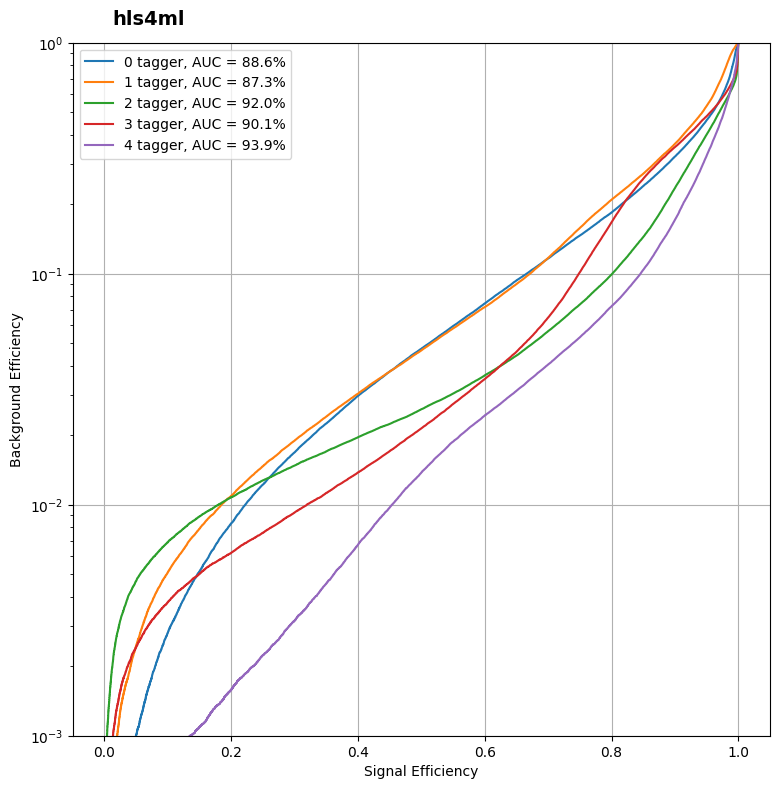

In [17]:
import plotting
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

y_keras = model.predict(X_test)
print("Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_keras, axis=1))))

# Convert label_encoder.classes_ to strings
label_encoder_classes_str = [str(cls) for cls in label_encoder.classes_]
# Plot ROC curve
plt.figure(figsize=(9, 9))
_ = plotting.makeRoc(y_test, y_keras, label_encoder_classes_str)

## Convert the model to FPGA firmware with hls4ml
Now we will go through the steps to convert the model we trained to a low-latency optimized FPGA firmware with hls4ml.
First, we will evaluate its classification performance to make sure we haven't lost accuracy using the fixed-point data types. 
Then we will synthesize the model with Vitis HLS and check the metrics of latency and FPGA resource usage.

### Make an hls4ml config & model
The hls4ml Neural Network inference library is controlled through a configuration dictionary.
In this example we'll use the most simple variation, later exercises will look at more advanced configuration.

In [18]:
import hls4ml

config = hls4ml.utils.config_from_keras_model(model, granularity='model', backend='Vitis')
print("-----------------------------------")
print("Configuration")
plotting.print_dict(config)
print("-----------------------------------")
hls_model = hls4ml.converters.convert_from_keras_model(
    model, hls_config=config, backend='Vitis', output_dir='/home/hep/lr1424/hls4ml-tutorial/model_1/hls4ml_prj', part='xcu250-figd2104-2L-e'
)

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 53]], output shape: [None, 53]
Layer name: fc1, layer type: Dense, input shapes: [[None, 53]], output shape: [None, 64]
Layer name: relu1, layer type: Activation, input shapes: [[None, 64]], output shape: [None, 64]
Layer name: fc2, layer type: Dense, input shapes: [[None, 64]], output shape: [None, 32]
Layer name: relu2, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: fc3, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: relu3, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: output, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 5]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 5]], output shape: [None, 5]
-----------------------------------
Configuration
Model
  Precision
    default:         fixed<16,6>
  ReuseFactor:       1
  S

Let's visualise what we created. The model architecture is shown, annotated with the shape and data types

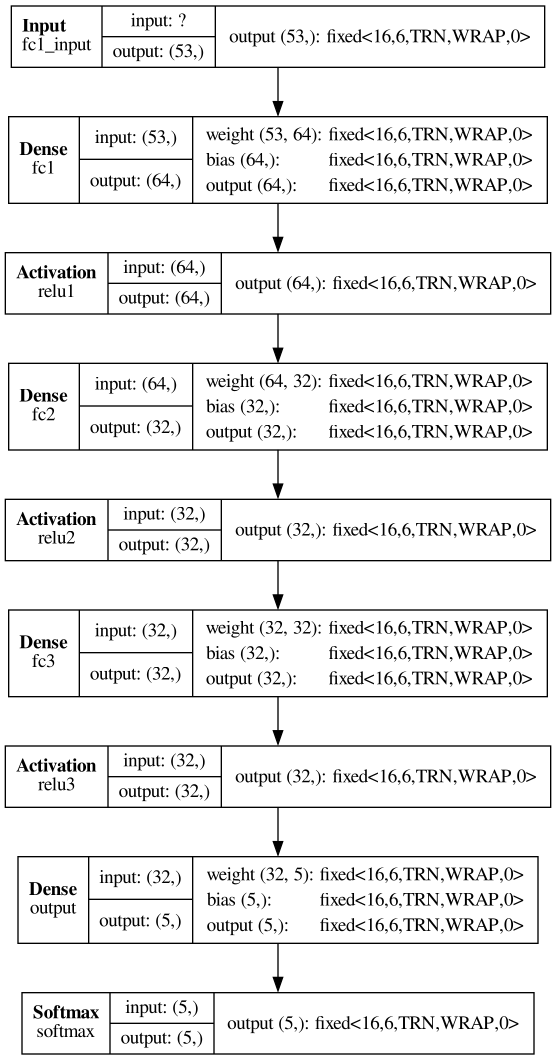

In [19]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

## Compile, predict
Now we need to check that this model performance is still good. We compile the hls_model, and then use `hls_model.predict` to execute the FPGA firmware with bit-accurate emulation on the CPU.

In [20]:
hls_model.compile()
X_test = np.ascontiguousarray(X_test)
y_hls = hls_model.predict(X_test)

Writing HLS project
Done


## Compare
That was easy! Now let's see how the performance compares to Keras:

Keras  Accuracy: 0.6985253968253968
hls4ml Accuracy: 0.18652857142857143


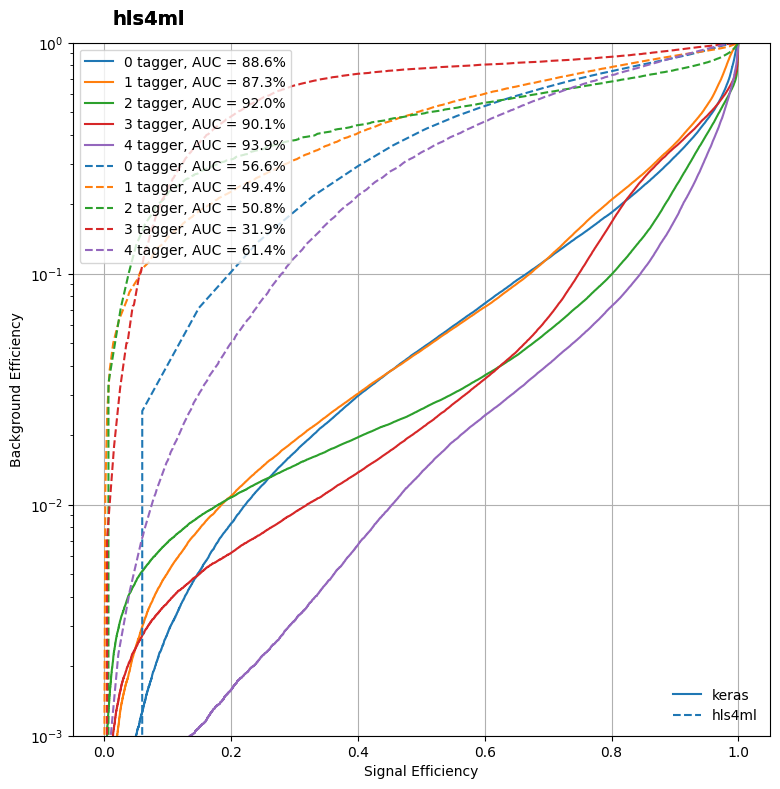

In [21]:
print("Keras  Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_keras, axis=1))))
print("hls4ml Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hls, axis=1))))

fig, ax = plt.subplots(figsize=(9, 9))
_ = plotting.makeRoc(y_test, y_keras, label_encoder_classes_str)
plt.gca().set_prop_cycle(None)  # reset the colors
_ = plotting.makeRoc(y_test, y_hls, label_encoder_classes_str, linestyle='--')

from matplotlib.lines import Line2D

lines = [Line2D([0], [0], ls='-'), Line2D([0], [0], ls='--')]
from matplotlib.legend import Legend

leg = Legend(ax, lines, labels=['keras', 'hls4ml'], loc='lower right', frameon=False)
ax.add_artist(leg)

## Synthesize
Now we'll actually use Vitis HLS to synthesize the model. We can run the build using a method of our `hls_model` object.
After running this step, we can integrate the generated IP into a workflow to compile for a specific FPGA board.
In this case, we'll just review the reports that Vitis HLS generates, checking the latency and resource usage.

**This can take several minutes.**

While the C-Synthesis is running, we can monitor the progress looking at the log file by opening a terminal from the notebook home, and executing:

`tail -f model_1/hls4ml_prj/vitis_hls.log`

In [22]:
import subprocess

# Run the source command
subprocess.run("source /opt/local/Vitis_HLS/2024.1/settings64.sh", shell=True, executable="/bin/bash")


CompletedProcess(args='source /opt/local/Vitis_HLS/2024.1/settings64.sh', returncode=0)

In [23]:
import sys
import os

# Add the directory containing callbacks.py to sys.path
sys.path.append(os.path.join(os.getcwd(), "hls4ml-tutorial"))

# Simulate sourcing the script to set variables (as a fallback)
os.environ['XILINX_VITIS'] = '/opt/local/Vitis_HLS/2024.1'  # Adjust this path as needed

# Update the PATH variable
os.environ['PATH'] = os.path.join(os.environ['XILINX_VITIS'], 'bin') + ':' + os.environ.get('PATH', '')


In [24]:
hls_model.build(csim=False)


****** Vitis HLS - High-Level Synthesis from C, C++ and OpenCL v2024.1 (64-bit)
  **** SW Build 5069499 on May 21 2024
  **** IP Build 5075265 on Wed May 22 21:45:21 MDT 2024
  **** SharedData Build 5076995 on Wed May 22 18:29:18 MDT 2024
  **** Start of session at: Thu Jan 23 12:45:51 2025
    ** Copyright 1986-2022 Xilinx, Inc. All Rights Reserved.
    ** Copyright 2022-2024 Advanced Micro Devices, Inc. All Rights Reserved.

source /opt/local/Vitis_HLS/2024.1/scripts/vitis_hls/hls.tcl -notrace
INFO: [HLS 200-10] For user 'lr1424' on host 'lxfw00.hep.ph.ic.ac.uk' (Linux_x86_64 version 5.14.0-503.15.1.el9_5.x86_64) on Thu Jan 23 12:45:52 GMT 2025
INFO: [HLS 200-10] On os "Rocky Linux 9.5 (Blue Onyx)"
INFO: [HLS 200-10] In directory '/home/hep/lr1424/model_1/hls4ml_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-1510] Running: open_project myproject_prj 
INFO: [HLS 200-10] Opening project '/home/hep/lr1424/model_1/hls4ml_prj/myproject_prj'.
INFO: [HLS 200-1510] Running: set_top

{'CSynthesisReport': {'TargetClockPeriod': '5.00',
  'EstimatedClockPeriod': '3.648',
  'BestLatency': '16',
  'WorstLatency': '16',
  'IntervalMin': '1',
  'IntervalMax': '1',
  'BRAM_18K': '8',
  'DSP': '3314',
  'FF': '30272',
  'LUT': '163354',
  'URAM': '0',
  'AvailableBRAM_18K': '5376',
  'AvailableDSP': '12288',
  'AvailableFF': '3456000',
  'AvailableLUT': '1728000',
  'AvailableURAM': '1280'}}

## Check the reports
Print out the reports generated by Vitis HLS. Pay attention to the Latency and the 'Utilization Estimates' sections

In [25]:
hls4ml.report.read_vivado_report('/home/hep/lr1424/hls4ml-tutorial/model_1/hls4ml_prj/')

Found 1 solution(s) in model_1/hls4ml_prj//myproject_prj.
Reports for solution "solution1":

C simulation report not found.
SYNTHESIS REPORT:
== Vitis HLS Report for 'myproject'
* Date:           Thu Jan 23 12:50:22 2025

* Version:        2024.1 (Build 5069499 on May 21 2024)
* Project:        myproject_prj
* Solution:       solution1 (Vivado IP Flow Target)
* Product family: virtexuplus
* Target device:  xcu250-figd2104-2L-e


== Performance Estimates
+ Timing: 
    * Summary: 
    +--------+---------+----------+------------+
    |  Clock |  Target | Estimated| Uncertainty|
    +--------+---------+----------+------------+
    |ap_clk  |  5.00 ns|  3.648 ns|     1.35 ns|
    +--------+---------+----------+------------+

+ Latency: 
    * Summary: 
    +---------+---------+-----------+-----------+-----+-----+---------+
    |  Latency (cycles) |   Latency (absolute)  |  Interval | Pipeline|
    |   min   |   max   |    min    |    max    | min | max |   Type  |
    +---------+---------+

## Exercise
Since `ReuseFactor = 1` we expect each multiplication used in the inference of our neural network to use 1 DSP. Is this what we see? (Note that the Softmax layer should use 5 DSPs, or 1 per class)
Calculate how many multiplications are performed for the inference of this network...
(We'll discuss the outcome)